In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/Scoring - Experian.csv',sep=';')

In [18]:
def label(df):
  node_Brilla = []
  riesgo_Brilla = []  
  node_GDC = []
  riesgo_GDC = []  
  for i in range(0,len(df)):
    
    if (df['Edad60Brilla'].iloc[i] <= 0) and (df['Edad0Brilla'].iloc[i] > 8) and (df['CuotasPendientesBrilla'].iloc[i] <= 7 or np.isnan(df['CuotasPendientesBrilla'].iloc[i])) and (df['Edad30Brilla'].iloc[i] <= 0):
      node_Brilla.append(1)
      riesgo_Brilla.append('Nivel Bajo')
  
    elif (df['Edad60Brilla'].iloc[i] <= 0) and (df['Edad0Brilla'].iloc[i] > 8) and (df['CuotasPendientesBrilla'].iloc[i] <= 7 or np.isnan(df['CuotasPendientesBrilla'].iloc[i])) and (df['Edad30Brilla'].iloc[i] > 0):
      node_Brilla.append(2)
      riesgo_Brilla.append('Nivel Bajo')
    
    elif (df['Edad60Brilla'].iloc[i] <= 0) and (df['Edad0Brilla'].iloc[i] > 8) and (df['CuotasPendientesBrilla'].iloc[i] > 7):
      node_Brilla.append(3)
      riesgo_Brilla.append('Nivel Bajo')
    
    elif (df['Edad60Brilla'].iloc[i] <= 0) and (df['Edad0Brilla'].iloc[i] > 1 and df['Edad0Brilla'].iloc[i] <= 8) and (df['CuotasPendientesBrilla'].iloc[i] <= 34 or np.isnan(df['CuotasPendientesBrilla'].iloc[i])):
      node_Brilla.append(4)
      riesgo_Brilla.append('Nivel Medio')
    
    elif (df['Edad60Brilla'].iloc[i] <= 0) and (df['Edad0Brilla'].iloc[i] > 1 and df['Edad0Brilla'].iloc[i] <= 8) and (df['CuotasPendientesBrilla'].iloc[i] > 34):
      node_Brilla.append(5)
      riesgo_Brilla.append('Nivel Medio')

    elif (df['Edad60Brilla'].iloc[i] <= 0) and (df['Edad0Brilla'].iloc[i] <= 1):
      node_Brilla.append(6)
      riesgo_Brilla.append('Nivel Medio')

    elif (df['Edad60Brilla'].iloc[i] > 0):
      node_Brilla.append(7)
      riesgo_Brilla.append('Nivel Alto')
    
    else:
      node_Brilla.append('MISSING')
      riesgo_Brilla.append('MISSING')
        
      
    
    if (df['Comport_Pago_Gas'].iloc[i] == '1-Pago A Tiempo') and (df['Edad0Gas'].iloc[i] > 12) and (df['CuotasPendientesGas'].iloc[i] <= 35):
      node_GDC.append(1)
      riesgo_GDC.append('Nivel Bajo')
    
    elif (df['Comport_Pago_Gas'].iloc[i] == '1-Pago A Tiempo') and (df['Edad0Gas'].iloc[i] > 12) and (df['CuotasPendientesGas'].iloc[i] > 35 or np.isnan(df['CuotasPendientesGas'].iloc[i])):
      node_GDC.append(2)
      riesgo_GDC.append('Nivel Bajo')
    
    elif (df['Comport_Pago_Gas'].iloc[i] == '1-Pago A Tiempo') and (df['Edad0Gas'].iloc[i] > 8 and df['Edad0Gas'].iloc[i] <= 12) and (df['CuotasPendientesGas'].iloc[i] <= 35):
      node_GDC.append(3)
      riesgo_GDC.append('Nivel Bajo')
    
    elif (df['Comport_Pago_Gas'].iloc[i] == '1-Pago A Tiempo') and (df['Edad0Gas'].iloc[i] <= 8) and (df['CuotasPendientesGas'].iloc[i] <= 35):
      node_GDC.append(4)
      riesgo_GDC.append('Nivel Bajo')
    
    elif (df['Comport_Pago_Gas'].iloc[i] == '1-Pago A Tiempo') and (df['Edad0Gas'].iloc[i] > 8 and df['Edad0Gas'].iloc[i] <= 12) and (df['CuotasPendientesGas'].iloc[i] > 35 or np.isnan(df['CuotasPendientesGas'].iloc[i])):
      node_GDC.append(5)
      riesgo_GDC.append('Nivel Bajo')
    
    elif (df['Comport_Pago_Gas'].iloc[i] == '1-Pago A Tiempo') and (df['Edad0Gas'].iloc[i] <= 8) and (df['CuotasPendientesGas'].iloc[i] > 35 or np.isnan(df['CuotasPendientesGas'].iloc[i])):
      node_GDC.append(6)
      riesgo_GDC.append('Nivel Medio')
    
    elif (df['Comport_Pago_Gas'].iloc[i] == '2-Pago Atrasado a 60 Dias') and (df['Edad60Gas'].iloc[i] <= 1):
      node_GDC.append(7)
      riesgo_GDC.append('Nivel Medio')
    
    elif (df['Comport_Pago_Gas'].iloc[i] == '2-Pago Atrasado a 60 Dias') and (df['Edad60Gas'].iloc[i] > 1):
      node_GDC.append(8)
      riesgo_GDC.append('Nivel Medio')
    
    elif (df['Comport_Pago_Gas'].iloc[i] == '3-No Paga a 90 Dias'):
      node_GDC.append(9)
      riesgo_GDC.append('Nivel Alto')

    else:
      node_GDC.append('MISSING')
      riesgo_GDC.append('MISSING')

  
  return node_Brilla,node_GDC,riesgo_Brilla,riesgo_GDC

In [19]:
node_Brilla,node_GDC,riesgo_Brilla,riesgo_GDC = label(df)

In [20]:
df['Nodo Brilla'] = node_Brilla
df['Riesgo Brilla'] = riesgo_Brilla
df['Nodo Gas'] = node_GDC
df['Riesgo Gas'] = riesgo_GDC

In [22]:
#df.to_csv('Modelo Verdadero.csv')

In [17]:
#df = pd.read_csv('/content/Modelo Verdadero.csv')

In [18]:
df.head()

,Unnamed: 0,FechaCierre,Identificacion,TipoIdentificacion,Contrato,Comport_Pago_Gas,Comport_Pago_Brilla,Edad0Gas,Edad30Gas,Edad60Gas,...,SaldoInicialGas,PlazoBrilla,CuotasPendientesBrilla,SaldoInicialBrilla,CuotaGas,CuotaBrilla,Nodo Brilla,Riesgo Brilla,Nodo Gas,Riesgo Gas
0,0,28/02/2019,26816647,Cédula,48237782,1-Pago A Tiempo,1-Pago A Tiempo,13,0,0,...,$ 127.053,36.0,35.0,$ 566.088,$ 9.472,$ 13.727,3,Nivel Bajo,2,Nivel Bajo
1,1,28/02/2019,8736917,Cédula,6102546,2-Pago Atrasado a 60 Dias,1-Pago A Tiempo,3,9,1,...,$ 261.724,36.0,36.0,$ 2.361.498,$ 17.266,$ 29.994,5,Nivel Medio,7,Nivel Medio
2,2,28/02/2019,26757900,Cédula,16103889,1-Pago A Tiempo,1-Pago A Tiempo,13,0,0,...,$ 197.770,36.0,36.0,$ 4.920.101,$ 7.964,$ 94.406,3,Nivel Bajo,2,Nivel Bajo
3,3,28/02/2019,32610825,Cédula,48088085,2-Pago Atrasado a 60 Dias,NaN,7,3,3,...,$ 131.851,0.0,0.0,$ 0,$ 12.660,$ 0,MISSING,MISSING,8,Nivel Medio
4,4,28/02/2019,77021174,Cédula,6206260,1-Pago A Tiempo,1-Pago A Tiempo,12,1,0,...,$ 95.045,0.0,0.0,$ 0,$ 6.448,$ 0,1,Nivel Bajo,5,Nivel Bajo


In [19]:
df[df['Riesgo Brilla'] != 'MISSING']

,Unnamed: 0,FechaCierre,Identificacion,TipoIdentificacion,Contrato,Comport_Pago_Gas,Comport_Pago_Brilla,Edad0Gas,Edad30Gas,Edad60Gas,...,SaldoInicialGas,PlazoBrilla,CuotasPendientesBrilla,SaldoInicialBrilla,CuotaGas,CuotaBrilla,Nodo Brilla,Riesgo Brilla,Nodo Gas,Riesgo Gas
0,0,28/02/2019,26816647,Cédula,48237782,1-Pago A Tiempo,1-Pago A Tiempo,13,0,0,...,$ 127.053,36.0,35.0,$ 566.088,$ 9.472,$ 13.727,3,Nivel Bajo,2,Nivel Bajo
1,1,28/02/2019,8736917,Cédula,6102546,2-Pago Atrasado a 60 Dias,1-Pago A Tiempo,3,9,1,...,$ 261.724,36.0,36.0,$ 2.361.498,$ 17.266,$ 29.994,5,Nivel Medio,7,Nivel Medio
2,2,28/02/2019,26757900,Cédula,16103889,1-Pago A Tiempo,1-Pago A Tiempo,13,0,0,...,$ 197.770,36.0,36.0,$ 4.920.101,$ 7.964,$ 94.406,3,Nivel Bajo,2,Nivel Bajo
4,4,28/02/2019,77021174,Cédula,6206260,1-Pago A Tiempo,1-Pago A Tiempo,12,1,0,...,$ 95.045,0.0,0.0,$ 0,$ 6.448,$ 0,1,Nivel Bajo,5,Nivel Bajo
5,5,28/02/2019,26665875,Cédula,17107145,1-Pago A Tiempo,1-Pago A Tiempo,0,13,0,...,$ 557.319,48.0,22.0,$ 3.897.789,$ 20.877,$ 65.630,6,Nivel Medio,4,Nivel Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545467,545467,28/02/2019,72148003,Cédula,48037802,1-Pago A Tiempo,1-Pago A Tiempo,13,0,0,...,NaN,NaN,NaN,NaN,$ 69.577,$ 16.961,1,Nivel Bajo,2,Nivel Bajo
545468,545468,28/02/2019,28424117,Cédula,1067680,1-Pago A Tiempo,1-Pago A Tiempo,10,3,0,...,NaN,NaN,NaN,NaN,$ 16.806,$ 0,1,Nivel Bajo,5,Nivel Bajo
545473,545473,28/02/2019,26933949,Cédula,14215225,1-Pago A Tiempo,1-Pago A Tiempo,13,0,0,...,NaN,NaN,NaN,NaN,$ 56.334,$ 0,1,Nivel Bajo,2,Nivel Bajo
545479,545479,28/02/2019,57421727,Cédula,48056263,1-Pago A Tiempo,1-Pago A Tiempo,13,0,0,...,NaN,NaN,NaN,NaN,$ 36.666,$ 24.868,1,Nivel Bajo,2,Nivel Bajo


In [20]:
def riesgo_total(df):
  riesgo_combinado = []
  for i in range(len(df)):
    if df['Riesgo Brilla'].iloc[i] != 'MISSING':
      riesgo_combinado.append(df['Riesgo Brilla'].iloc[i])
    else:
      riesgo_combinado.append(df['Riesgo Gas'].iloc[i])
    
  
  df['Riesgo Combinado'] = riesgo_combinado
  
  return df

In [21]:
new_df = riesgo_total(df)

In [22]:
new_df.head()

,Unnamed: 0,FechaCierre,Identificacion,TipoIdentificacion,Contrato,Comport_Pago_Gas,Comport_Pago_Brilla,Edad0Gas,Edad30Gas,Edad60Gas,...,PlazoBrilla,CuotasPendientesBrilla,SaldoInicialBrilla,CuotaGas,CuotaBrilla,Nodo Brilla,Riesgo Brilla,Nodo Gas,Riesgo Gas,Riesgo Combinado
0,0,28/02/2019,26816647,Cédula,48237782,1-Pago A Tiempo,1-Pago A Tiempo,13,0,0,...,36.0,35.0,$ 566.088,$ 9.472,$ 13.727,3,Nivel Bajo,2,Nivel Bajo,Nivel Bajo
1,1,28/02/2019,8736917,Cédula,6102546,2-Pago Atrasado a 60 Dias,1-Pago A Tiempo,3,9,1,...,36.0,36.0,$ 2.361.498,$ 17.266,$ 29.994,5,Nivel Medio,7,Nivel Medio,Nivel Medio
2,2,28/02/2019,26757900,Cédula,16103889,1-Pago A Tiempo,1-Pago A Tiempo,13,0,0,...,36.0,36.0,$ 4.920.101,$ 7.964,$ 94.406,3,Nivel Bajo,2,Nivel Bajo,Nivel Bajo
3,3,28/02/2019,32610825,Cédula,48088085,2-Pago Atrasado a 60 Dias,NaN,7,3,3,...,0.0,0.0,$ 0,$ 12.660,$ 0,MISSING,MISSING,8,Nivel Medio,Nivel Medio
4,4,28/02/2019,77021174,Cédula,6206260,1-Pago A Tiempo,1-Pago A Tiempo,12,1,0,...,0.0,0.0,$ 0,$ 6.448,$ 0,1,Nivel Bajo,5,Nivel Bajo,Nivel Bajo


In [23]:
def add_priority(df,column):
    new_riesgo = []
    for i in range(0,len(df)):
        if df[column].iloc[i] == 'Nivel Bajo':
            new_riesgo.append(1)
        elif df[column].iloc[i] == 'Nivel Medio':
            new_riesgo.append(2)
        elif df[column].iloc[i] == 'Nivel Alto':
            new_riesgo.append(3)
    
    df['Riesgo Combinado Priorizado'] = new_riesgo
    
    return df

In [24]:
new_df = add_priority(new_df,'Riesgo Combinado')

In [27]:
riesgos_asociados = pd.DataFrame(new_df.groupby('Identificacion')['Riesgo Combinado Priorizado'].max())

In [29]:
def settle_priority(df,column):
    new_riesgo = []
    for i in range(0,len(df)):
        if df[column].iloc[i] == 1:
            new_riesgo.append('Nivel Bajo')
        elif df[column].iloc[i] == 2:
            new_riesgo.append('Nivel Medio')
        elif df[column].iloc[i] == 3:
            new_riesgo.append('Nivel Alto')
            
    df['Riesgo Combinado Nuevo'] = new_riesgo
    
    return df

In [30]:
new_df = settle_priority(new_df,'Riesgo Combinado Priorizado')

In [31]:
new_df.head()

,Unnamed: 0,FechaCierre,Identificacion,TipoIdentificacion,Contrato,Comport_Pago_Gas,Comport_Pago_Brilla,Edad0Gas,Edad30Gas,Edad60Gas,...,SaldoInicialBrilla,CuotaGas,CuotaBrilla,Nodo Brilla,Riesgo Brilla,Nodo Gas,Riesgo Gas,Riesgo Combinado,Riesgo Combinado Priorizado,Riesgo Combinado Nuevo
0,0,28/02/2019,26816647,Cédula,48237782,1-Pago A Tiempo,1-Pago A Tiempo,13,0,0,...,$ 566.088,$ 9.472,$ 13.727,3,Nivel Bajo,2,Nivel Bajo,Nivel Bajo,1,Nivel Bajo
1,1,28/02/2019,8736917,Cédula,6102546,2-Pago Atrasado a 60 Dias,1-Pago A Tiempo,3,9,1,...,$ 2.361.498,$ 17.266,$ 29.994,5,Nivel Medio,7,Nivel Medio,Nivel Medio,2,Nivel Medio
2,2,28/02/2019,26757900,Cédula,16103889,1-Pago A Tiempo,1-Pago A Tiempo,13,0,0,...,$ 4.920.101,$ 7.964,$ 94.406,3,Nivel Bajo,2,Nivel Bajo,Nivel Bajo,1,Nivel Bajo
3,3,28/02/2019,32610825,Cédula,48088085,2-Pago Atrasado a 60 Dias,NaN,7,3,3,...,$ 0,$ 12.660,$ 0,MISSING,MISSING,8,Nivel Medio,Nivel Medio,2,Nivel Medio
4,4,28/02/2019,77021174,Cédula,6206260,1-Pago A Tiempo,1-Pago A Tiempo,12,1,0,...,$ 0,$ 6.448,$ 0,1,Nivel Bajo,5,Nivel Bajo,Nivel Bajo,1,Nivel Bajo


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


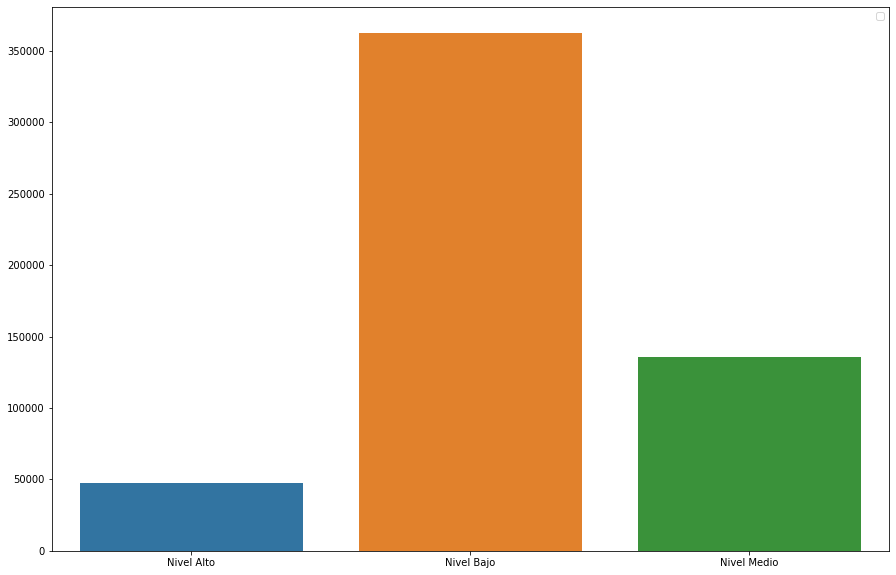

In [32]:
plt.figure(figsize=(15,10))
keys, counts = np.unique(new_df['Riesgo Combinado Nuevo'], return_counts=True)

sns.barplot(keys, counts)
plt.legend()
plt.show()

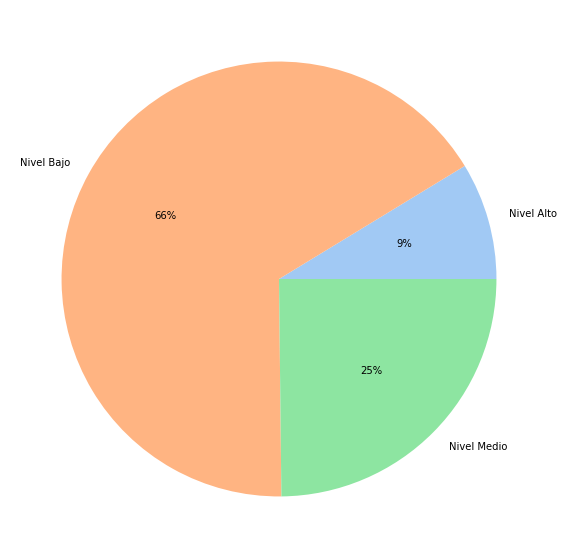

In [33]:
colors = sns.color_palette('pastel')[0:3]

plt.figure(figsize=(15,10))

#create pie chart
plt.pie(counts, labels = keys, colors = colors, autopct='%.0f%%',)
plt.show()